In [28]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
flows = pd.read_csv('headworks_flow.csv', index_col=False)

In [30]:
flows['datetime'] = pd.to_datetime(flows['datetime'])
flows['surge'] = [0 if x < 10 else (x * 0.00144) for x in flows['surge']]
flows['combined'] = flows['influent'] + flows['surge']

In [31]:
hourly_flow = flows.groupby(flows['datetime'].dt.hour).mean()

In [34]:
march_1 = '2022-03-01'
april_1 = '2022-04-01'
may_1 = '2022-05-01'
june_1 = '2022-06-01'

In [45]:
march_flows = flows.loc[flows['datetime'] < april_1]
march_flows = march_flows.groupby(march_flows['datetime'].dt.hour).mean()

april_flows = flows.loc[(flows['datetime'] < may_1) & (flows['datetime'] >= april_1)]
april_flows = april_flows.groupby(april_flows['datetime'].dt.hour).mean()

may_flows = flows.loc[(flows['datetime'] < june_1) & (flows['datetime'] >= may_1)]
may_flows = may_flows.groupby(may_flows['datetime'].dt.hour).mean()

june_flows = flows.loc[june_1 < flows['datetime']]
june_flows = june_flows.groupby(june_flows['datetime'].dt.hour).mean()

In [5]:
flows.head(50)

,datetime,influent,surge,combined
0,2022-03-01 09:21:00,2.657392,0.000000,2.657392
1,2022-03-01 09:57:00,2.508996,0.000000,2.508996
2,2022-03-01 10:33:00,2.027532,0.000000,2.027532
3,2022-03-01 11:09:00,2.564586,0.000000,2.564586
4,2022-03-01 11:45:00,2.093957,0.000000,2.093957
5,2022-03-01 12:21:00,2.424198,0.000000,2.424198
6,2022-03-01 12:57:00,2.895297,0.000000,2.895297
7,2022-03-01 13:33:00,2.523600,0.000000,2.523600
8,2022-03-01 14:09:00,3.016370,0.000000,3.016370
9,2022-03-01 14:45:00,2.583901,1.014762,3.598663


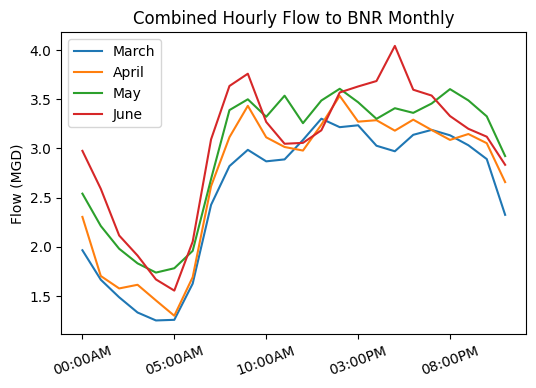

In [56]:
plt.plot(march_flows['combined'], label='March')
plt.plot(april_flows['combined'], label='April')
plt.plot(may_flows['combined'], label='May')
plt.plot(june_flows['combined'], label='June')
plt.ylabel('Flow (MGD)')
plt.title('Combined Hourly Flow to BNR Monthly')
plt.legend()
plt.xticks([0, 5, 10, 15, 20], ['00:00AM', '05:00AM', '10:00AM', '03:00PM', '08:00PM'],
       rotation=20)
plt.show()

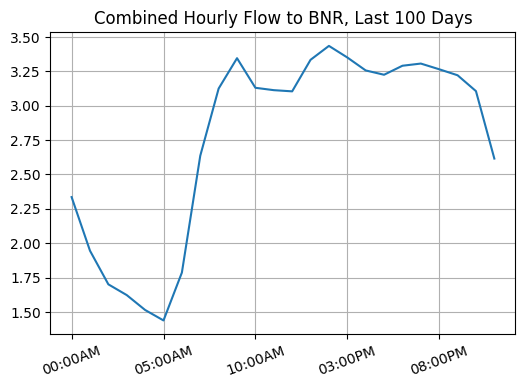

In [60]:
plt.plot(hourly_flow['combined'])
plt.title('Combined Hourly Flow to BNR, Last 100 Days')
plt.xticks([0, 5, 10, 15, 20], ['00:00AM', '05:00AM', '10:00AM', '03:00PM', '08:00PM'],
       rotation=20)
plt.grid()
plt.show()